In [1]:
import reload_data

In [5]:
source_dir = "/content/Data"

In [4]:
import tensorflow as tf
import keras
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
import numpy as np

In [9]:
from sklearn.preprocessing import label_binarize

In [6]:
train_ds,val_ds = reload_data.full_unzip_and_stratify("/content/CSAFE_Handwriting_Images.zip",source_dir)

Found 1980 files belonging to 90 classes.
Found 450 files belonging to 90 classes.


In [8]:
BaseModel = load_model("/content/BaseModel_colab.keras")
EfficientNet = load_model("/content/EfficientNet.keras")
MobileNet = load_model("/content/MobileNet.keras")

### ResNet50V2

In [10]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = BaseModel.predict(images)  # shape: (batch_size, num_classes)
    y_pred.append(preds)
    y_true.append(labels.numpy())

# Convert lists to arrays
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Binarize the true labels (needed for multiclass ROC)
n_classes = y_pred.shape[1]
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


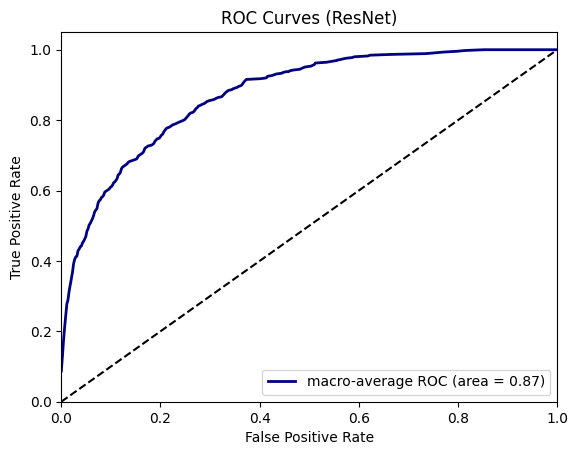

In [11]:
fpr = dict()
tpr = dict()
roc_auc = dict()

y_true_bin = np.array(y_true_bin)
y_pred = np.array(y_pred)


for i in range(90):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


####Macro Average
# First aggregate all FPRs
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(90)]))

# Then interpolate all ROC curves at these points and average the TPR
mean_tpr = np.zeros_like(all_fpr)
for i in range(90):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 90  # Average it

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])



# Plot example: micro-average + 2 sample classes
#plt.figure(figsize=(10, 6))
#plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC (area = {0:0.2f})'.format(roc_auc["micro"]),
#         color='deeppink', linewidth=2)


#ResNet
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle='-', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (ResNet)')
plt.legend(loc="lower right")

plt.show()

### EfficientNetB1

In [12]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = EfficientNet.predict(images)  # shape: (batch_size, num_classes)
    y_pred.append(preds)
    y_true.append(labels.numpy())

# Convert lists to arrays
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Binarize the true labels (needed for multiclass ROC)
n_classes = y_pred.shape[1]
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [16]:
fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()

y_true_bin = np.array(y_true_bin)
y_pred = np.array(y_pred)


for i in range(90):
    fpr1[i], tpr1[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])

####Macro Average
# First aggregate all FPRs
all_fpr = np.unique(np.concatenate([fpr1[i] for i in range(90)]))

# Then interpolate all ROC curves at these points and average the TPR
mean_tpr1 = np.zeros_like(all_fpr)
for i in range(90):
    mean_tpr1 += np.interp(all_fpr, fpr1[i], tpr1[i])

mean_tpr1 /= 90  # Average it

fpr1["macro"] = all_fpr
tpr1["macro"] = mean_tpr1
roc_auc1["macro"] = auc(fpr1["macro"], tpr1["macro"])

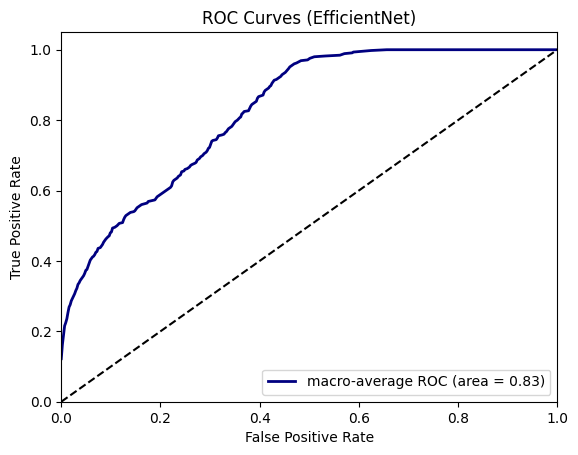

In [18]:
#EfficientNet
plt.plot(fpr1["macro"], tpr1["macro"],
         label='macro-average ROC (area = {0:0.2f})'.format(roc_auc1["macro"]),
         color='navy', linestyle='-', linewidth=2)


plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (EfficientNet)')
plt.legend(loc="lower right")

plt.show()

### MobileNetV2

In [19]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = MobileNet.predict(images)  # shape: (batch_size, num_classes)
    y_pred.append(preds)
    y_true.append(labels.numpy())

# Convert lists to arrays
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Binarize the true labels (needed for multiclass ROC)
n_classes = y_pred.shape[1]
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [20]:
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()

y_true_bin = np.array(y_true_bin)
y_pred = np.array(y_pred)


for i in range(90):
    fpr2[i], tpr2[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

####Macro Average
# First aggregate all FPRs
all_fpr = np.unique(np.concatenate([fpr2[i] for i in range(90)]))

# Then interpolate all ROC curves at these points and average the TPR
mean_tpr2 = np.zeros_like(all_fpr)
for i in range(90):
    mean_tpr2 += np.interp(all_fpr, fpr2[i], tpr2[i])

mean_tpr2 /= 90  # Average it

fpr2["macro"] = all_fpr
tpr2["macro"] = mean_tpr2
roc_auc2["macro"] = auc(fpr2["macro"], tpr2["macro"])

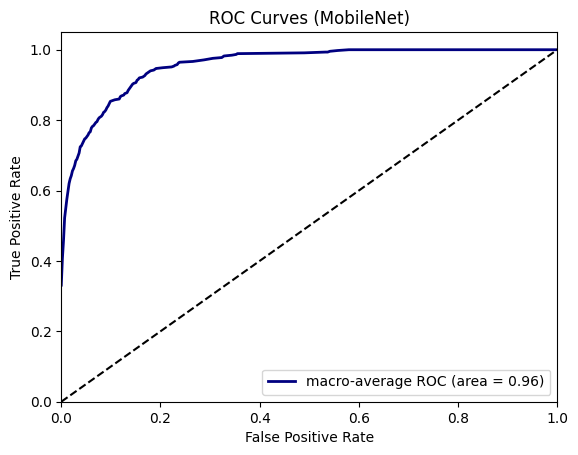

In [24]:
#MobileNet
plt.plot(fpr2["macro"], tpr2["macro"],
         label='macro-average ROC (area = {0:0.2f})'.format(roc_auc2["macro"]),
         color='navy', linestyle='-', linewidth=2)


plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (MobileNet)')
plt.legend(loc="lower right")

plt.show()

## Comparison

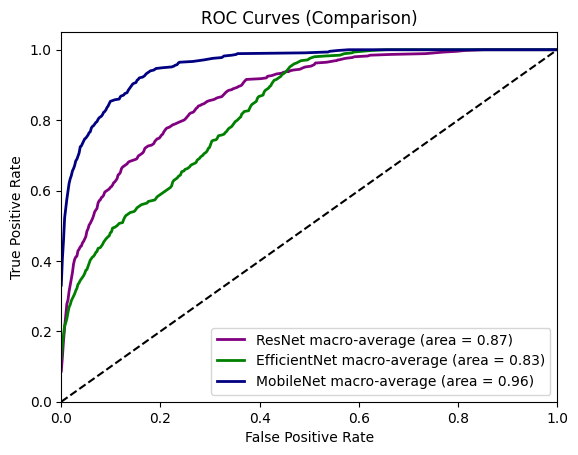

In [25]:
#ResNet
plt.plot(fpr["macro"], tpr["macro"],
         label='ResNet macro-average (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='purple', linestyle='-', linewidth=2)

#EfficientNet
plt.plot(fpr1["macro"], tpr1["macro"],
         label='EfficientNet macro-average (area = {0:0.2f})'.format(roc_auc1["macro"]),
         color='green', linestyle='-', linewidth=2)


#MobileNet
plt.plot(fpr2["macro"], tpr2["macro"],
         label='MobileNet macro-average (area = {0:0.2f})'.format(roc_auc2["macro"]),
         color='navy', linestyle='-', linewidth=2)


plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Comparison)')
plt.legend(loc="lower right")

plt.show()